# Lab 5 - report, Michał Błaszczak [245047]

# Task 1 (Correlations in AR models)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(100)

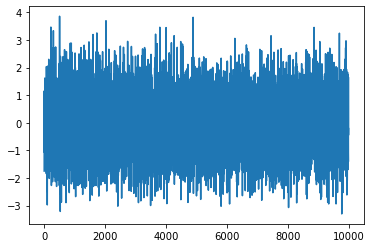

In [4]:
eta_t = np.random.normal(0,1,10000)
plt.plot(eta_t)

### Write a function that calculates the values of AR(p) model. The function must have a parameter burnin that determines how many initial values are discarded

In [5]:
def AR(p, c, phi_t, n, burnin):
    # initial y_t values
    # y_t = np.array([1 for x in range(p)])
    y_t = np.empty(p)
    y_t.fill(0.1)
    n_max = n + burnin
    # calculate 
    for t in range(p, n_max):
        y_t_value = c
        
        # for y, phi in zip(y_t, phi_t):
        #     y_t_value = y_t_value + y*phi
        # y_t_value = y_t_value + eta_t[t]
        # y_t = np.append(y_t, y_t_value)

        for j in range(p):
            y_t_value = y_t_value + phi_t[j] * y_t[t-j-1]
        y_t_value = y_t_value + np.random.randn()
        y_t = np.append(y_t, y_t_value)
        
    # drop first 'burnin' results
    y_t = y_t[burnin:]
    
    # return array
    return y_t

### Calculate n = 5000 values of AR(1) model y_t = 18 − 0.6*y_t−1 + eta_t, autocorrelation (ACF) and partial autocorrelation (PACF) functions for this time series

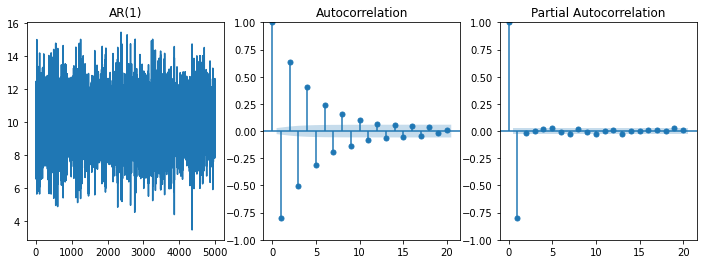

In [6]:
p = 1
c = 18
phi = [-0.8]
n = 5000
burnin = 1000

AR_1 = AR(p, c, phi, n, burnin)

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].plot(AR_1)
ax[0].set_title('AR(1)')
sm.graphics.tsa.plot_acf(AR_1,lags=20, zero=True, ax=ax[1])
sm.graphics.tsa.plot_pacf(AR_1,lags=20, zero=True, ax=ax[2])
plt.show()

### Repeat the calculations for phi_1 = −0.7, −0.8, −0.9

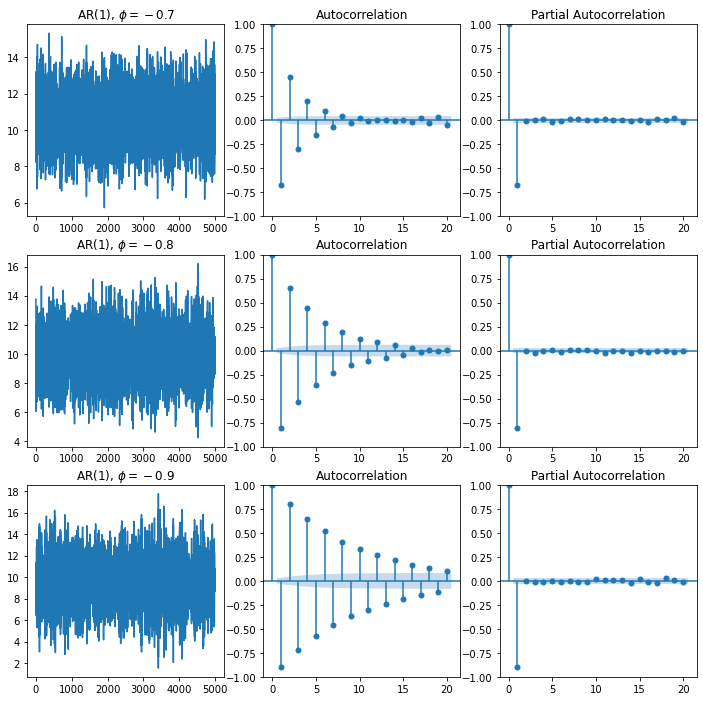

In [7]:
p = 1
c = 18
n = 5000
burnin = 1000

AR_2 = AR(p, c, [-0.7], n, burnin)
AR_3 = AR(p, c, [-0.8], n, burnin)
AR_4 = AR(p, c, [-0.9], n, burnin)

fig, ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].plot(AR_2)
ax[0,0].set_title('AR(1), $\phi=-0.7$')
sm.graphics.tsa.plot_acf(AR_2,lags=20, zero=True, ax=ax[0,1])
sm.graphics.tsa.plot_pacf(AR_2,lags=20, zero=True, ax=ax[0,2])

ax[1,0].plot(AR_3)
ax[1,0].set_title('AR(1), $\phi=-0.8$')
sm.graphics.tsa.plot_acf(AR_3,lags=20, zero=True, ax=ax[1,1])
sm.graphics.tsa.plot_pacf(AR_3,lags=20, zero=True, ax=ax[1,2])

ax[2,0].plot(AR_4)
ax[2,0].set_title('AR(1), $\phi=-0.9$')
sm.graphics.tsa.plot_acf(AR_4,lags=20, zero=True, ax=ax[2,1])
sm.graphics.tsa.plot_pacf(AR_4,lags=20, zero=True, ax=ax[2,2])

plt.show()

### Are the generated time series stationary? What happens when |φ1| > 1

In [8]:
print(adfuller(AR_2))
print(adfuller(AR_3))
print(adfuller(AR_4))

(-161.17813540445275, 0.0, 0, 4999, {'1%': -3.431658793968827, '5%': -2.862118345383404, '10%': -2.567077853953267}, 14073.7372254202)
(-217.46679457281255, 0.0, 0, 4999, {'1%': -3.431658793968827, '5%': -2.862118345383404, '10%': -2.567077853953267}, 14063.12047163388)
(-301.248073747264, 0.0, 0, 4999, {'1%': -3.431658793968827, '5%': -2.862118345383404, '10%': -2.567077853953267}, 14080.666806495949)


In [9]:
# all pi values are smaller than 0.05 so datasets are stationary

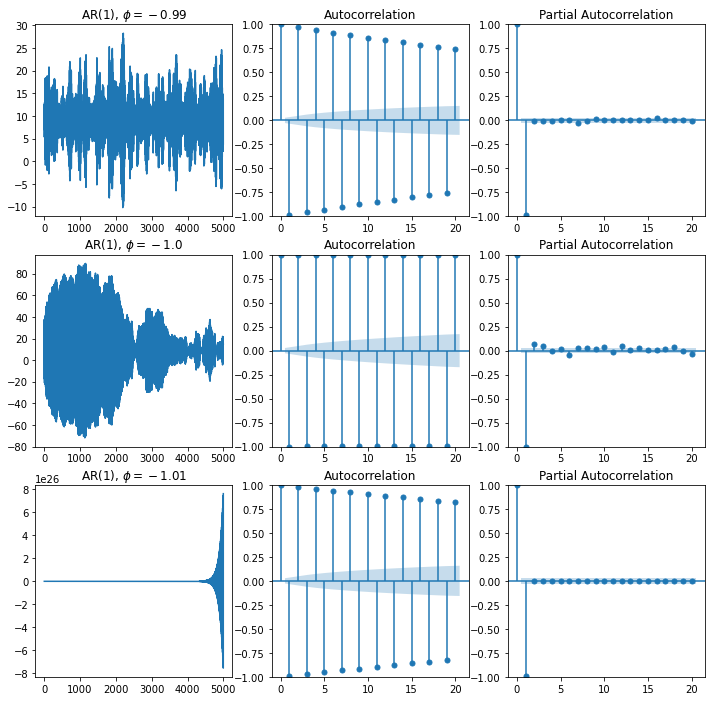

In [10]:
p = 1
c = 18
n = 5000
burnin = 1000

AR_2 = AR(p, c, [-0.99], n, burnin)
AR_3 = AR(p, c, [-1.0], n, burnin)
AR_4 = AR(p, c, [-1.01], n, burnin)

fig, ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].plot(AR_2)
ax[0,0].set_title('AR(1), $\phi=-0.99$')
sm.graphics.tsa.plot_acf(AR_2,lags=20, zero=True, ax=ax[0,1])
sm.graphics.tsa.plot_pacf(AR_2,lags=20, zero=True, ax=ax[0,2])

ax[1,0].plot(AR_3)
ax[1,0].set_title('AR(1), $\phi=-1.0$')
sm.graphics.tsa.plot_acf(AR_3,lags=20, zero=True, ax=ax[1,1])
sm.graphics.tsa.plot_pacf(AR_3,lags=20, zero=True, ax=ax[1,2])

ax[2,0].plot(AR_4)
ax[2,0].set_title('AR(1), $\phi=-1.01$')
sm.graphics.tsa.plot_acf(AR_4,lags=20, zero=True, ax=ax[2,1])
sm.graphics.tsa.plot_pacf(AR_4,lags=20, zero=True, ax=ax[2,2])

plt.show()

### Calculate n = 5000 values of AR(2) model yt = 8 + 1.3yt−1 − 0.7yt−2 + εt. Compare the structure of PACFs for AR(1) and AR(2) models

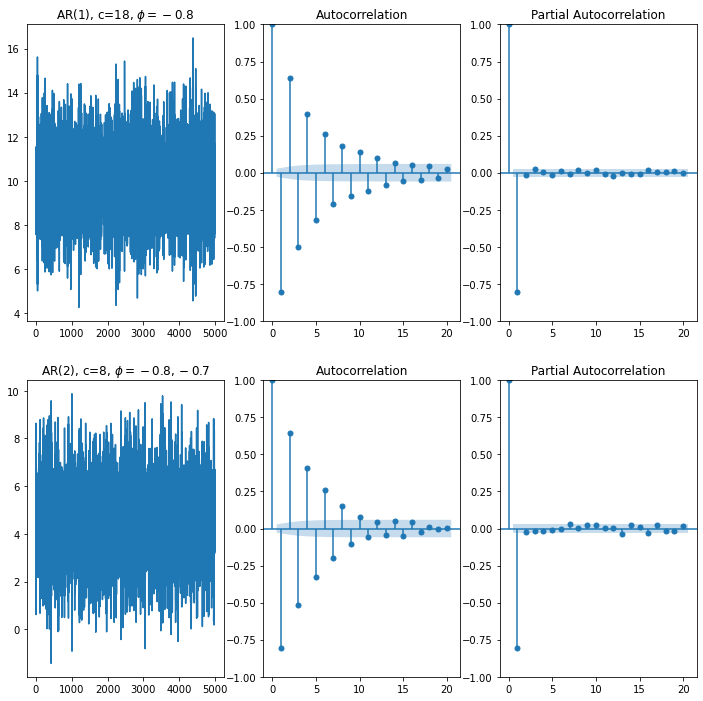

In [11]:
p = 1
n = 5000
burnin = 1000

AR_6 = AR(p, 18, [-0.8], n, burnin)
AR_7 = AR(p, 8, [-0.8, -0.7], n, burnin)

fig, ax = plt.subplots(2,3,figsize=(12,12))

ax[0,0].plot(AR_6)
ax[0,0].set_title('AR(1), c=18, $\phi=-0.8$')
sm.graphics.tsa.plot_acf(AR_6,lags=20, zero=True, ax=ax[0,1])
sm.graphics.tsa.plot_pacf(AR_6,lags=20, zero=True, ax=ax[0,2])

ax[1,0].plot(AR_7)
ax[1,0].set_title('AR(2), c=8, $\phi=-0.8, -0.7$')
sm.graphics.tsa.plot_acf(AR_7,lags=20, zero=True, ax=ax[1,1])
sm.graphics.tsa.plot_pacf(AR_7,lags=20, zero=True, ax=ax[1,2])

plt.show()

# Task 2 (AR forecasting)

### Download data using pandas’ read_html function

In [33]:
data = pd.read_html('https://www.indexmundi.com/commodities/?commodity=robusta-coffee&months=236')
data

[                                                   0
 0  Coffee, Robusta Daily Price105.00Coffee, Robus...,
         Month  Price  Change
 0    Jun 2002   0.63       -
 1    Jul 2002   0.63   0.00%
 2    Aug 2002   0.61  -3.17%
 3    Sep 2002   0.71  16.39%
 4    Oct 2002   0.73   2.82%
 ..        ...    ...     ...
 231  Sep 2021   2.31  10.00%
 232  Oct 2021   2.32   0.43%
 233  Nov 2021   2.41   3.88%
 234  Dec 2021   2.48   2.90%
 235  Jan 2022   2.43  -2.02%
 
 [236 rows x 3 columns],
                                                    0
 0                                        Tata Coffee
 1  Website: http://www.tatacoffee.com/  Location:...]

#### extract dataframe and set index

In [34]:
df = data[1]
df = df.drop(['Change'], axis=1)
df

,Month,Price
0,Jun 2002,0.63
1,Jul 2002,0.63
2,Aug 2002,0.61
3,Sep 2002,0.71
4,Oct 2002,0.73
...,...,...
231,Sep 2021,2.31
232,Oct 2021,2.32
233,Nov 2021,2.41
234,Dec 2021,2.48


In [35]:
# df = df.set_index('Month')
index = pd.date_range(start="2002-06", end="2022-02", freq="M")
df = df.set_index(index)
df = df.drop(['Month'], axis=1)
df
# index is et in such way instead of the commented one because otherwise plotting data and AR prediction was unsuccesfull

,Price
2002-06-30,0.63
2002-07-31,0.63
2002-08-31,0.61
2002-09-30,0.71
2002-10-31,0.73
...,...
2021-09-30,2.31
2021-10-31,2.32
2021-11-30,2.41
2021-12-31,2.48


#### control plot

<AxesSubplot:>

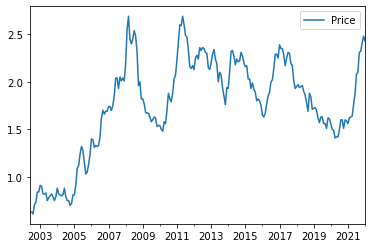

In [36]:
df.plot()

### For calculations, use data for the two decades of this century. First, use the original time series to forecast twelve months into the future 

In [38]:
div = len(df) - 1 - 12
train_1 = df.iloc[:div]
test_1 = df.iloc[div:]
start = len(train_1)
stop = len(df)-1

In [39]:
AR_1_fit = AutoReg(train_1['Price'],lags=1).fit()

In [40]:
AR_1_prediction = AR_1_fit.predict(start=start, end=stop ,dynamic=False).rename('AR(1) predictions')
AR_1_prediction.to_frame()

,AR(1) predictions
2021-01-31,1.598070
2021-02-28,1.605939
2021-03-31,1.613612
2021-04-30,1.621094
2021-05-31,1.628389
2021-06-30,1.635502
2021-07-31,1.642438
2021-08-31,1.649201
2021-09-30,1.655795
2021-10-31,1.662225


<AxesSubplot:>

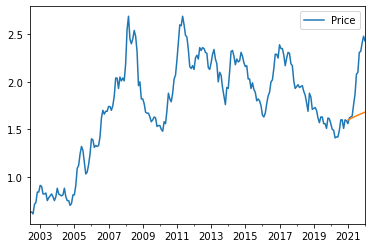

In [41]:
df.plot()
AR_1_prediction.plot()

### After differencing, repeat the analysis

In [46]:
df_2 = df.diff()
train_2 = df_2.iloc[:div]
test_2 = df_2.iloc[div:]

In [47]:
AR_2_fit = AutoReg(train_2['Price'].dropna(),lags=1).fit()

In [48]:
AR_2_prediction = AR_2_fit.predict(start=start, end=stop ,dynamic=False).rename('AR(1) predictions after diff')
AR_2_prediction.to_frame()

,AR(1) predictions after diff
2021-02-28,0.003485
2021-03-31,0.004124
2021-04-30,0.004280
2021-05-31,0.004317
2021-06-30,0.004326
2021-07-31,0.004329
2021-08-31,0.004329
2021-09-30,0.004329
2021-10-31,0.004329
2021-11-30,0.004329


<AxesSubplot:>

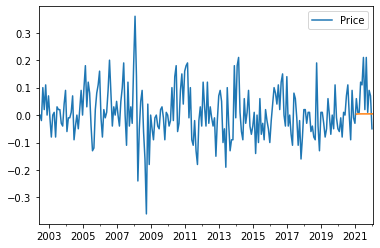

In [49]:
df_2.plot()
AR_2_prediction.plot()

### Compare the accuracy of the forecast for the undifferenced and differenced data. Note that the differencing is invertible

In [51]:
diff_1 = mean_squared_error(test_1, AR_1_prediction)
diff_2 = mean_squared_error(test_2, AR_2_prediction)

In [52]:
print('accuracy (undifferenced):', diff_1)
print('accuracy (differenced):', diff_2)

accuracy (undifferenced): 0.23769578093958835
accuracy (differenced): 0.009872116080935349
